In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy
%matplotlib notebook
from numpy.linalg import eig
from matplotlib import pyplot
from scripts.plot_helper import *

<IPython.core.display.Javascript object>


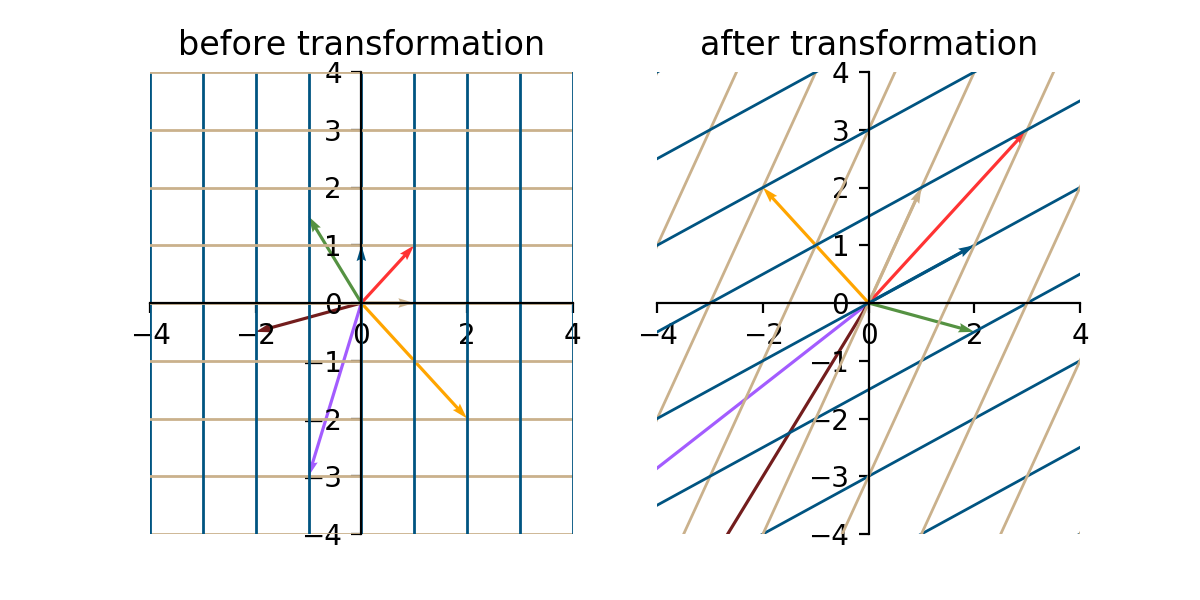

In [3]:
matrix = numpy.array([[1,2], [2,1]])
vector1 = numpy.array([1,1])
vector2 = numpy.array([-1,1.5])
vector3 = numpy.array([2,-2])
vector4 = numpy.array([-1,-3])
vector5 = numpy.array([-2,-0.5])
plot_linear_transformation(matrix, vector1, vector2, vector3, vector4, vector5)

We plot 5 vectors both before and after the transformation along with the grid. Some vectors rotate to a different angle after the transformation, while the yellow one and the red one stay on the same line as before: the yellow vector $(2,-2)$ lands on $(-2,2)$ and the red vector $(1,1)$ lands on $(3,3)$. If you plot more vectors with different orientations, you will find that most vectors land at a different angle and only some will not be rotated after the transformation. These vectors are just scaled by a number. For example, the red one is streched to 3 times its original length; the yellow one is flipped over with the same length, so the scale in this case is -1.

Knowing that a matrix-vector multiplication is equivalent to performing a linear transformation to the vector, we can represent the observation above in a mathematical way:

$$A \vec{v} = \lambda \vec{v}$$

$\vec{v}$ is the vector and $A \vec{v}$ is the new vector after some transformation $A$, $\lambda$ denotes the scaling factor.

Does it look familiar? Yes, a vector $\vec{v}$ that satisfies this equation is called an eigenvector of matrix A and the corresponding $\lambda$ is called an eigenvalue of matrix A. For the matrix $\begin{bmatrix} 1 & 2 \\ 2 & 1 \end{bmatrix}$, the first eigenvector is $(1,1)$ pairing with an eigenvalue of 3, the second eigenvector is $(2,-2)$ pairing with an eigenvalue of -1. Let's verify our result by solving $A \vec{v} = \lambda \vec{v}$.

- In linear algebra class: $\det (A-\lambda I) = 0$ (optional, see determinant's geometrical interpretation)
- Use python builtin function: `numpy.linalg.eig`

In [14]:
eigenvalues, eigenvectors = eig(matrix)
for eigenvalue, eigenvector in zip(eigenvalues, eigenvectors.T):
    print(eigenvalue, eigenvector)

3.0000000000000004 [0.70710678 0.70710678]
-0.9999999999999996 [-0.70710678  0.70710678]


Why the eigenvectors are different from what we have eyeballed?

<IPython.core.display.Javascript object>


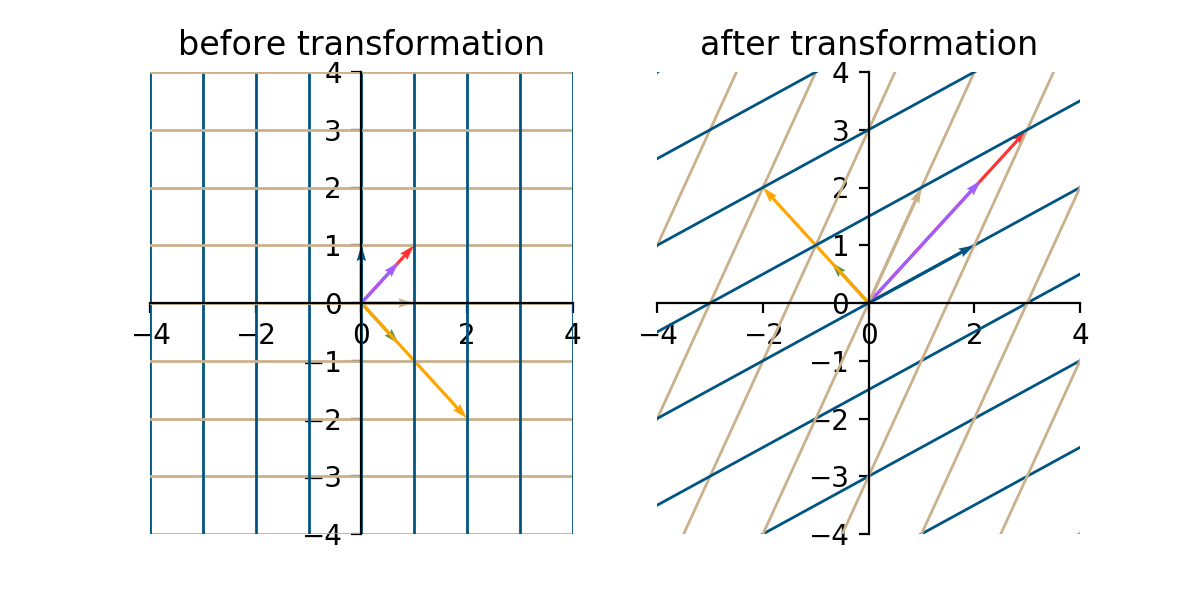

In [13]:
plot_linear_transformation(matrix, vector1, eigenvectors[0], vector3, eigenvectors[1])

Both vector $(0.70710678, 0.70710678)$ and $(1,1)$ satisfy $A\vec{v} = \lambda \vec{v}$ with $\lambda=3$ and they are on the same line. Any vector on this line is an eigenvector and it will land on this line. If a vector $\vec{v}$ is an eigenvector corresponding to the eigenvalue $\lambda$, then any vector on the same line $\vec{w} = k\vec{v}$ will satisfy $A\vec{w} = \lambda \vec{w}$, the vector before and after transformation are just scaled by $k$. `numpy.linalg.eig` simply gives us the eigenvectors with a unit length.

- other cases: no eigenvalues, 1 eigenvalue
- introduce what is diagonal matrix